First 5 Rows:
          date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0  03-05-2021  Indonesia   0       1  18393     0    110     80            1   
1  05-08-2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  
0       2     1     168   Architect      0    62.0        0  
1       1     1     156  Accountant      0    85.0        1  
2       1     1     165        Chef      0    64.0        1  
3       2     1     169      Lawyer      0    82.0        1  
4       1     1     156   Architect      0    56.0        0  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Colum

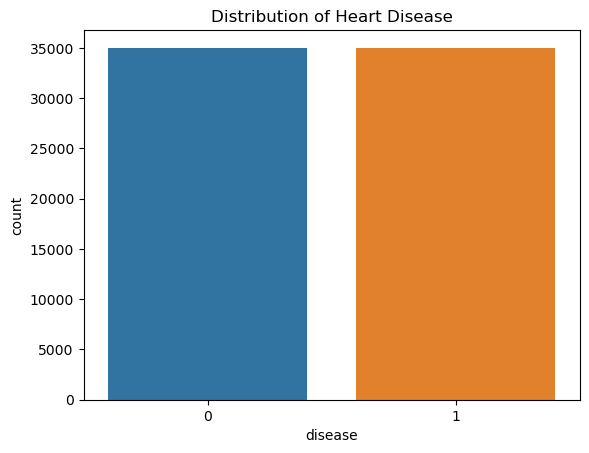

ValueError: could not convert string to float: '03-05-2021'

In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 📌 Step 2: Load Dataset
df = pd.read_csv('heart_disease_data.csv')  # Adjust path as needed
print("First 5 Rows:\n", df.head())
print("\nData Info:\n")
df.info()

# 📌 Step 3: Handle Missing Values
print("\nMissing Values:\n", df.isnull().sum())
df.dropna(inplace=True)

# 📌 Step 4: Visualize Target Distribution
if 'disease' in df.columns:
    sns.countplot(data=df, x='disease')
    plt.title("Distribution of Heart Disease")
    plt.show()

# 📌 Step 5: Feature & Target Split
X = df.drop(columns=['disease'])  # Features
y = df['disease']                 # Target

# 📌 Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Step 8: Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 📌 Step 9: Predictions and Evaluation
y_pred = model.predict(X_test)

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 10: Visualize Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


         date    country  id  active    age  alco  ap_hi  ap_lo  cholesterol  \
0  03-05-2021  Indonesia   0       1  18393     0    110     80            1   
1  05-08-2021   Malaysia   1       1  20228     0    140     90            3   
2  13-11-2022  Indonesia   2       0  18857     0    130     70            3   
3  31-10-2018  Singapore   3       1  17623     0    150    100            1   
4  25-09-2020  Singapore   4       0  17474     0    100     60            1   

   gender  gluc  height  occupation  smoke  weight  disease  
0       2     1     168   Architect      0    62.0        0  
1       1     1     156  Accountant      0    85.0        1  
2       1     1     165        Chef      0    64.0        1  
3       2     1     169      Lawyer      0    82.0        1  
4       1     1     156   Architect      0    56.0        0  

Data Types:
 date            object
country         object
id               int64
active           int64
age              int64
alco             i

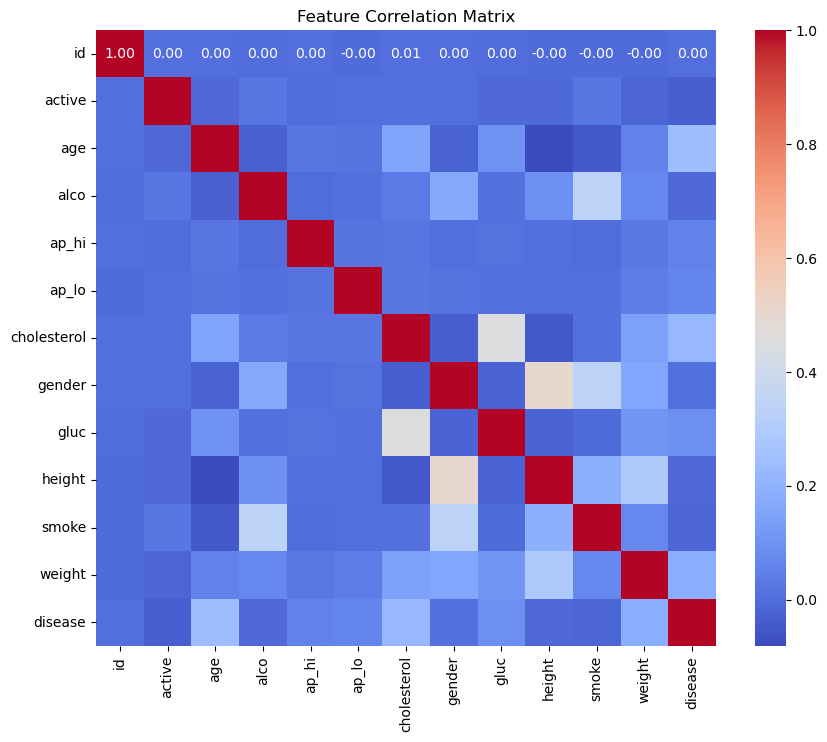

In [2]:
# 📌 Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 📌 Step 2: Load Dataset
df = pd.read_csv('heart_disease_data.csv')  # Adjust path as needed
print(df.head())
print("\nData Types:\n", df.dtypes)

# 📌 Step 3: Drop non-numeric columns (like date)
# You can also convert them to datetime and extract features if relevant
df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# 📌 Step 4: Handle Missing Values
df.dropna(inplace=True)

# 📌 Step 5: Define Features and Target
X = df.drop(columns=['disease'])  # Features
y = df['disease']                 # Target

# 📌 Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 📌 Step 8: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 📌 Step 9: Predictions & Evaluation
y_pred = model.predict(X_test)

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 10: Optional Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
